In [66]:
import pandas as pd 
import numpy as np

data = pd.read_csv('Airlines_graph.csv')

In [67]:
import matplotlib.pyplot as plt
import networkx as nx
import regex
data.shape
data.dtypes

year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
dtype: object

In [68]:
nx.__version__

'2.3'

In [69]:
# converting sched_dep_time to 'std' - Scheduled time of departure
data['std'] = data.sched_dep_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_dep_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

C:\Users\Richa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [70]:
# converting sched_arr_time to 'sta' - Scheduled time of arrival
data['sta'] = data.sched_arr_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_arr_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

# converting dep_time to 'atd' - Actual time of departure
data['atd'] = data.dep_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + data.dep_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

C:\Users\Richa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
C:\Users\Richa\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


In [71]:
# converting arr_time to 'ata' - Actual time of arrival
data['ata'] = data.arr_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + data.arr_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

C:\Users\Richa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [72]:
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

In [73]:
# finally we drop the columns we don't need
data = data.drop(columns = ['year', 'month', 'day'])

In [74]:
FG = nx.from_pandas_edgelist(data, source='origin', target='dest', edge_attr=True,)

In [75]:
FG.nodes()

NodeView(('EWR', 'MEM', 'LGA', 'FLL', 'SEA', 'JFK', 'DEN', 'ORD', 'MIA', 'PBI', 'MCO', 'CMH', 'MSP', 'IAD', 'CLT', 'TPA', 'DCA', 'SJU', 'ATL', 'BHM', 'SRQ', 'MSY', 'DTW', 'LAX', 'JAX', 'RDU', 'MDW', 'DFW', 'IAH', 'SFO', 'STL', 'CVG', 'IND', 'RSW', 'BOS', 'CLE'))

In [76]:
FG.edges()

EdgeView([('EWR', 'MEM'), ('EWR', 'SEA'), ('EWR', 'MIA'), ('EWR', 'ORD'), ('EWR', 'MSP'), ('EWR', 'TPA'), ('EWR', 'MSY'), ('EWR', 'DFW'), ('EWR', 'IAH'), ('EWR', 'SFO'), ('EWR', 'CVG'), ('EWR', 'IND'), ('EWR', 'RDU'), ('EWR', 'IAD'), ('EWR', 'RSW'), ('EWR', 'BOS'), ('EWR', 'PBI'), ('EWR', 'LAX'), ('EWR', 'MCO'), ('EWR', 'SJU'), ('LGA', 'FLL'), ('LGA', 'ORD'), ('LGA', 'PBI'), ('LGA', 'CMH'), ('LGA', 'IAD'), ('LGA', 'CLT'), ('LGA', 'MIA'), ('LGA', 'DCA'), ('LGA', 'BHM'), ('LGA', 'RDU'), ('LGA', 'ATL'), ('LGA', 'TPA'), ('LGA', 'MDW'), ('LGA', 'DEN'), ('LGA', 'MSP'), ('LGA', 'DTW'), ('LGA', 'STL'), ('LGA', 'MCO'), ('LGA', 'CVG'), ('LGA', 'IAH'), ('FLL', 'JFK'), ('SEA', 'JFK'), ('JFK', 'DEN'), ('JFK', 'MCO'), ('JFK', 'TPA'), ('JFK', 'SJU'), ('JFK', 'ATL'), ('JFK', 'SRQ'), ('JFK', 'DCA'), ('JFK', 'DTW'), ('JFK', 'LAX'), ('JFK', 'JAX'), ('JFK', 'CLT'), ('JFK', 'PBI'), ('JFK', 'CLE'), ('JFK', 'IAD'), ('JFK', 'BOS')])

C:\Users\Richa\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


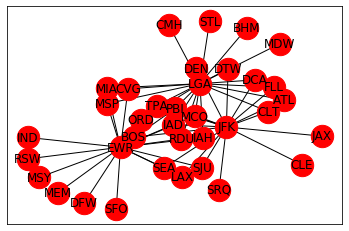

In [77]:
# your code is here (Quick view of the plotph.) 
plot = nx.spring_layout(FG)
nx.draw_networkx_nodes(FG, plot, node_size = 500, node_color = 'r')
nx.draw_networkx_labels(FG, plot)
nx.draw_networkx_edges(FG, plot, edgelist=FG.edges, arrows=True)
plt.show()

In [78]:
nx.algorithms.degree_centrality(FG) # Notice the 3 airports from which all of our 100 rows of data originates
# Calculate average edge density of the Graph

# your code is here
np.mean(list(nx.algorithms.degree_centrality(FG).values()))

0.09047619047619045

In [79]:
nx.average_shortest_path_length(FG) # Average shortest path length for ALL paths in the Graph

2.36984126984127

In [80]:
nx.average_degree_connectivity(FG) # For a node of degree k - What is the average of its neighbours' degree?

{20: 1.95, 1: 19.307692307692307, 2: 19.0625, 17: 2.0588235294117645, 3: 19.0}

In [81]:
# Let us find all the paths available
for path in nx.all_simple_paths(FG, source='JAX', target='DFW'):
 print(path)

['JAX', 'JFK', 'DEN', 'LGA', 'ORD', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'PBI', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'IAD', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MIA', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'RDU', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'TPA', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MSP', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MCO', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'CVG', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'IAH', 'EWR', 'DFW']
['JAX', 'JFK', 'SEA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'ORD', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'PBI', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'IAD', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'MIA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'RDU', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'TPA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'MSP', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'CVG', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'IAH', 'EWR', 'DFW']
['JAX', 'JFK',

In [82]:
# Let us find the dijkstra path from JAX to DFW.
# You can read more in-depth on how dijkstra works from this resource - https://courses.csail.mit.edu/6.006/fall11/lectures/lecture16.pdf
dijpath = nx.dijkstra_path(FG, source='JAX', target='DFW')
dijpath

['JAX', 'JFK', 'SEA', 'EWR', 'DFW']

In [83]:
# Let us try to find the dijkstra path weighted by airtime (approximate case)
shortest_path = nx.dijkstra_path(FG, source='JAX', target='DFW', weight='air_time')
shortest_path

['JAX', 'JFK', 'BOS', 'EWR', 'DFW']

### ASSIGNMENT-4 (100 Points)

Please use the Airlines_graph.csv for the following questions.

1. Please fill "your code here" sections on above cells (10 Points).

2. How many maximal cliques we can spot in this airline network? (20 Points)

3. List the most busiest/popular airport. (20 Points) 

4. As a thought leader, identify 6 new routes to recommend. Hint: Think if the pairs are symmetric or not and make your assumption/observation accordingly i.e. whether ORD-LAX and LAX-ORD two separate routes? (50 Points)



#### 2. 
How many maximal cliques we can spot in this airline network

In [84]:
def max_cliques(G, size):
    spot = []
    for cliques in nx.find_cliques(G):
        if len(cliques) == size:
            spot.append(cliques)
    return list(spot)

In [85]:
print(len(max_cliques(FG, 1)))
print(len(max_cliques(FG, 2)))
print(len(max_cliques(FG, 3)))

0
57
0


From the above results, we can conclude that there are 57 maximal cliques in this airline network

#### 3.

List the most busiest/popular airport.

In [86]:
node_mapping = [(i, len(list(FG.neighbors(i)))) for i in FG.nodes()]

In [87]:
node_sorted = pd.Series(data=dict(node_mapping))
node_sorted.sort_values(ascending=False).head()

EWR    20
LGA    20
JFK    17
TPA     3
PBI     3
dtype: int64

From above result, we can see the LGA and EWR are the most popular airports

#### 4
As a thought leader, identify 6 new routes to recommend. Hint: Think if the pairs are symmetric or not and make your assumption/observation accordingly i.e. whether ORD-LAX and LAX-ORD two separate routes?

In [97]:
# Import modules
from itertools import combinations
from collections import defaultdict

# Create a defaultdict
recommend_airpair = defaultdict(int)

# Iterate over all the nodes in FG
for n, d in FG.nodes(data=True):

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(FG.neighbors(n), 2):
    
        # Check whether there's an edge between n1 and n2
        if not FG.has_edge(n1, n2):
        
            # Add incremental in recommend_pair
            recommend_airpair[(n1, n2)] += 1

In [99]:
all_counts = sorted(recommend_airpair.values())
top6_pairs = [pair for pair, count in recommend_airpair.items() if count > all_counts[-7]]
print(top6_pairs)

[('LGA', 'JFK'), ('EWR', 'JFK'), ('JFK', 'LGA'), ('LGA', 'EWR'), ('EWR', 'LGA'), ('JFK', 'EWR')]


From the above result, I can recommend six new routes which are:
('LGA', 'JFK'), ('EWR', 'JFK'), ('JFK', 'LGA'), ('LGA', 'EWR'), ('EWR', 'LGA'), ('JFK', 'EWR')